# Credit Card Fraud Detection using Machine Learning

# About Data :

This is a dataset containing credit card transactions with 31 features and a class label. The features represent various aspects of the transaction, and the class label indicates whether the transaction was fraudulent (class 1) or not (class 0).

The first feature is "Time", which represents the number of seconds elapsed between the transaction and the first transaction in the dataset. The next 28 features, V1 to V28, are anonymized variables resulting from a principal component analysis (PCA) transformation of the original features. They represent different aspects of the transaction, such as the amount, location, and type of transaction.

The second last feature is "Amount", which represents the transaction amount in USD. The last feature is the "Class" label, which indicates whether the transaction is fraudulent (class 1) or not (class 0).

Overall, this dataset is used to train machine learning models to detect fraudulent transactions in real-time. The features are used to train the model to learn patterns in the data, which can then be used to detect fraudulent transactions in future transactions.

# Importing libraries

In [ ]:
import pandas as pd 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

# The Data 

Let's start by reading in the credit data.csv file into a pandas dataframe.

In [ ]:
# importing csv file 

df = pd.read_csv("credit data.csv")

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.shape

(284807, 31)

# Missing Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# check for null values

pd.isnull(df).sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Data Preprocessing

In [ ]:
# Apply standard scaler method  

from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
df['Amount'] = scaler.fit_transform(pd.DataFrame(df[['Amount']]))

In [ ]:
df.head ()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,0.514355,0


In [ ]:
df.duplicated().any()

True

In [ ]:
# drop the duplicate values 

df = df.drop_duplicates()

In [ ]:
df.shape

(283726, 31)

In [ ]:
# distribution of legit transactions & fraudulent transactions

df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64



This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

# Exploratory Data Analysis

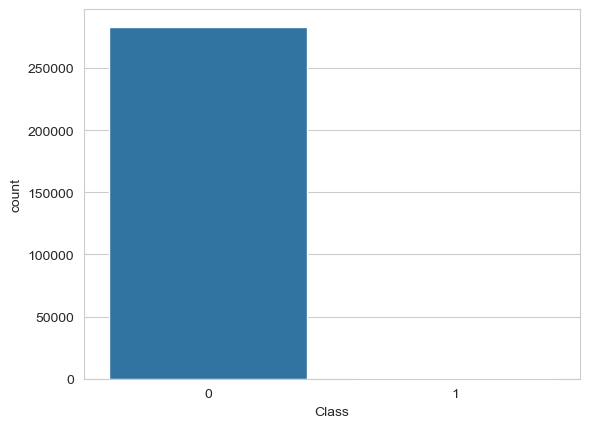

In [ ]:
# plotting the countplot for class

import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.countplot(x="Class",data=df)
plt.show()

In [ ]:
x = df.drop('Class', axis = 1)
y =df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [ ]:
x_train.shape

(226980, 30)

In [ ]:
(x_test.shape),(y_train.shape),(y_test.shape)

((56746, 30), (226980,), (56746,))

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression 

lr=LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Accuracy Score

In [ ]:
# accuracy on training data
    
from sklearn.metrics import accuracy_score
x_train_prediction = lr.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9991056480747202


In [ ]:
# accuracy on test data

x_test_prediction = lr.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.999066013463504


# Precision score

In [ ]:
# Precision on training data
    
from sklearn.metrics import precision_score
x_train_prediction = lr.predict(x_train)
training_data_precision = precision_score(x_train_prediction, y_train)

In [ ]:
print('precision on Training data : ', training_data_precision)

precision on Training data :  0.7061855670103093


In [ ]:
# precision on test data

x_test_prediction = lr.predict(x_test)
test_data_precision = precision_score(x_test_prediction, y_test)

In [ ]:
print('precision score on Test Data : ', test_data_precision)

precision score on Test Data :  0.6705882352941176


# Recall score

In [ ]:
# Recall on training data
    
from sklearn.metrics import recall_score
x_train_prediction = lr.predict(x_train)
training_data_recall = recall_score(x_train_prediction, y_train)

In [ ]:
print('recall on training data : ', training_data_recall)

recall on training data :  0.7548209366391184


In [ ]:
# Recall on test data

x_test_prediction = lr.predict(x_test)
test_data_recall = recall_score(x_test_prediction, y_test)

In [ ]:
print('recall on Test data : ', test_data_recall)

recall on Test data :  0.6951219512195121


# F1 score

In [ ]:
# f1 on training data
    
from sklearn.metrics import f1_score
x_train_prediction = lr.predict(x_train)
training_data_f1 = f1_score(x_train_prediction, y_train)

In [ ]:
print('f1 on Training data : ', training_data_f1)

f1 on Training data :  0.7296937416777629


In [ ]:
# f1 on test data

x_test_prediction = lr.predict(x_test)
test_data_f1 = f1_score(x_test_prediction, y_test)

In [ ]:
print('f1 on Test data : ', test_data_f1)

f1 on Test data :  0.6826347305389221


# Separation of Data

In [ ]:
# separating the data for analysis

legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


In [ ]:
# statistical measures of the data

legit.Amount.describe()

count    283253.000000
mean          0.000256
std           1.001037
min          -0.353229
25%          -0.330560
50%          -0.265271
75%          -0.043538
max         102.362243
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count    473.000000
mean       0.142021
std        1.040346
min       -0.353229
25%       -0.349231
50%       -0.313968
75%        0.070128
max        8.146182
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transactions

df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,0.000256
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,0.142021


# Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 473

In [ ]:
legit_sample = legit.sample(n=473)

Concatenating two DataFrames

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
203886,135017.0,2.192440,-1.570212,-0.770640,-1.874443,-1.169166,0.095501,-1.433943,0.074683,-1.383383,...,-0.298289,-0.635231,0.385993,0.118176,-0.601924,-0.502881,0.014715,-0.034378,-0.117342,0
29882,35677.0,-0.058036,-0.415983,-0.293202,-3.718037,1.736911,3.156669,-0.426641,0.402038,-1.594991,...,-0.492280,-0.742820,0.214671,0.913493,-1.168748,-0.868705,0.142644,-0.084195,-0.330200,0
203367,134790.0,-0.883785,1.073824,1.255267,-0.143030,0.046778,0.699183,-0.343895,-2.554899,0.689577,...,2.443547,0.187156,-0.129804,-0.627238,-0.075952,-0.016268,0.199939,-0.063412,-0.234526,0
61178,49697.0,1.450636,-1.339952,0.870353,-1.287251,-1.670463,0.154048,-1.477081,0.015675,-1.122644,...,-0.267412,-0.219628,-0.076382,-0.427103,0.380473,-0.150106,0.078160,0.031736,-0.173316,0
276265,166991.0,1.714173,-0.471117,-2.125417,0.283259,0.446670,-0.195899,0.148127,-0.028498,0.772707,...,-0.140575,-0.554915,0.023743,0.097221,-0.088482,-0.124878,-0.040586,0.000184,0.298938,0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,-0.183191,1


In [ ]:
new_dataset['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95201.583510,-0.013723,0.055632,-0.006987,-0.015034,-0.052099,0.020517,0.033423,0.033305,-0.005954,...,0.057173,0.025568,-0.008908,0.005275,0.029163,-0.039140,0.013457,0.019858,0.009735,0.026212
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,0.142021


# Train and Test split method

In [ ]:
x = new_dataset.drop(columns='Class', axis=1)
y = new_dataset['Class']

In [ ]:
print (x)

            Time        V1        V2        V3        V4        V5        V6  \
203886  135017.0  2.192440 -1.570212 -0.770640 -1.874443 -1.169166  0.095501   
29882    35677.0 -0.058036 -0.415983 -0.293202 -3.718037  1.736911  3.156669   
203367  134790.0 -0.883785  1.073824  1.255267 -0.143030  0.046778  0.699183   
61178    49697.0  1.450636 -1.339952  0.870353 -1.287251 -1.670463  0.154048   
276265  166991.0  1.714173 -0.471117 -2.125417  0.283259  0.446670 -0.195899   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print (y)

203886    0
29882     0
203367    0
61178     0
276265    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
x_train.shape

(756, 30)

In [ ]:
x_test.shape

(190, 30)

In [ ]:
y_train.shape

(756,)

In [ ]:
y_test.shape

(190,)

# Model Training


# Logistic Regression

In [ ]:
# Using logistic regression for predicting the model

from sklearn.linear_model import LogisticRegression 

lr=LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation



# Accuracy Score

In [ ]:
 # accuracy on training data
    
from sklearn.metrics import accuracy_score
x_train_prediction = lr.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9523809523809523


In [ ]:
# accuracy on test data

x_test_prediction = lr.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9368421052631579


In [ ]:
lr.predict(x_test)

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [ ]:
lr.predict(x_train)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,

# Precision score

In [ ]:
# Precision on training data
    
from sklearn.metrics import precision_score
x_train_prediction = lr.predict(x_train)
training_data_precision = precision_score(x_train_prediction, y_train)

In [ ]:
print('precision on Training data : ', training_data_precision)

precision on Training data :  0.9326145552560647


In [ ]:
# precision on test data

x_test_prediction = lr.predict(x_test)
test_data_precision = precision_score(x_test_prediction, y_test)

In [ ]:
print('precision score on Test Data : ', test_data_precision)

precision score on Test Data :  0.9117647058823529


# Recall score

In [ ]:
# Recall on training data
    
from sklearn.metrics import recall_score
x_train_prediction = lr.predict(x_train)
training_data_recall = recall_score(x_train_prediction, y_train)

In [ ]:
print('recall on training data : ', training_data_recall)

recall on training data :  0.969187675070028


In [ ]:
# Recall on test data

x_test_prediction = lr.predict(x_test)
test_data_recall = recall_score(x_test_prediction, y_test)

In [ ]:
print('recall on Test data : ', test_data_recall)

recall on Test data :  0.96875


# F1 score

In [ ]:
# f1 on training data
    
from sklearn.metrics import f1_score
x_train_prediction = lr.predict(x_train)
training_data_f1 = f1_score(x_train_prediction, y_train)

In [ ]:
print('f1 on Training data : ', training_data_f1)

f1 on Training data :  0.9505494505494505


In [ ]:
# f1 on test data

x_test_prediction = lr.predict(x_test)
test_data_f1 = f1_score(x_test_prediction, y_test)

In [ ]:
print('f1 on Test data : ', test_data_f1)

f1 on Test data :  0.9393939393939394


# Oversampling

In [ ]:
x = df.drop('Class', axis = 1)
y= df['Class']

In [ ]:
x.shape

(283726, 30)

In [ ]:
y.shape

(283726,)

In [ ]:
# SMOTE oversampling technique

from imblearn.over_sampling import SMOTE  

In [ ]:
x_res, y_res = SMOTE().fit_resample(x,y)

In [ ]:
y_res.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res,test_size=0.2, random_state=2)

In [ ]:
(x_train.shape),(x_test.shape),(y_train.shape),(y_test.shape)

((453204, 30), (113302, 30), (453204,), (113302,))

# Logistic Regression

In [ ]:
# Using logistic regression for predicting the model

from sklearn.linear_model import LogisticRegression 

lr=LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Accuracy score

In [ ]:
# accuracy on training data
    
from sklearn.metrics import accuracy_score
x_train_prediction = lr.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9716617682103423


In [ ]:
# accuracy on test data

x_test_prediction = lr.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9714126846834125


# Precision score

In [ ]:
# Precision on training data
    
from sklearn.metrics import precision_score
x_train_prediction = lr.predict(x_train)
training_data_precision = precision_score(x_train_prediction, y_train)

In [ ]:
print('precision on Training data : ', training_data_precision)

precision on Training data :  0.9613349469537027


In [ ]:
# precision on test data

x_test_prediction = lr.predict(x_test)
test_data_precision = precision_score(x_test_prediction, y_test)

In [ ]:
print('precision score on Test Data : ', test_data_precision)

precision score on Test Data :  0.9609653983499569


# Recall Score

In [ ]:
# Recall on training data
    
from sklearn.metrics import recall_score
x_train_prediction = lr.predict(x_train)
training_data_recall = recall_score(x_train_prediction, y_train)

In [ ]:
print('recall on training data : ', training_data_recall)

recall on training data :  0.9815595672428644


In [ ]:
# Recall on test data

x_test_prediction = lr.predict(x_test)
test_data_recall = recall_score(x_test_prediction, y_test)

In [ ]:
print('recall on Test data : ', test_data_recall)

recall on Test data :  0.9816705002875216


# F1 Score

In [ ]:
# f1 on training data
    
from sklearn.metrics import f1_score
x_train_prediction = lr.predict(x_train)
training_data_f1 = f1_score(x_train_prediction, y_train)

In [ ]:
print('f1 on Training data : ', training_data_f1)

f1 on Training data :  0.9713419926943615


In [ ]:
# f1 on test data

x_test_prediction = lr.predict(x_test)
test_data_f1 = f1_score(x_test_prediction, y_test)

In [ ]:
# f1 on test data

x_test_prediction = lr.predict(x_test)
test_data_f1 = f1_score(x_test_prediction, y_test)

In [ ]:
print('f1 on Test data : ', test_data_f1)

f1 on Test data :  0.9712076092270768


# Apply Joblib

In [ ]:
# using joblib for saving the model

import joblib
joblib.dump(lr,"lr_joblib")

['lr_joblib']

In [ ]:
lr = joblib.load('lr_joblib')

In [ ]:
lr.coef_

array([[-3.81238466e-05,  2.90479764e-01, -3.18085902e-01,
        -7.61932864e-01,  8.30560280e-01,  4.09774468e-01,
        -2.83737046e-01, -1.09044188e-01, -5.34775907e-01,
        -4.71360880e-01, -5.58195766e-01,  1.07571027e-01,
        -7.74939018e-01, -4.33031204e-01, -1.40267965e+00,
        -3.72434285e-01, -6.59949295e-01, -9.67387097e-01,
        -1.05797012e-01,  2.20312842e-01, -5.66113549e-02,
         1.33125126e-01,  4.11773131e-01,  8.08542337e-02,
         7.52628830e-02, -2.61602941e-01, -3.56722501e-02,
         7.73455135e-02,  4.34041598e-02,  1.99032137e-01]])

In [ ]:
lr.intercept_

array([-0.74778596])

In [ ]:
lr.predict([[2,-1.158233093,0.877736755,1.548717847,0.403033934,-0.407193377,0.095921462,0.592940745,-0.270532677,0.817739308,0.753074432,-0.822842878,0.53819555,1.345851593,-1.119669835,0.17512113,-0.451449183,-0.237033239,-0.038194787,0.803486925,0.40854236,-0.009430697,0.798278495,-0.13745808,0.141266984,-0.206009588,0.502292224,0.21942223,0.215153147,69.99
]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [ ]:
lr.predict(x_test)

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

# Conclusion

1. In this project, i successfully developed a machine learning model to identify fraudulent credit card transactions. 

2. I performed data preprocessing, normalization, and addressed class imbalance through undersampling. 

3. The dataset was split into training and testing sets.

4. I trained logistic regression and evaluated their performance using accuracy, precision, recall, and F1-score. 

5. The logistic regression  model achieved the highest performance with an recall-score of 0.97, demonstrating its effectiveness in distinguishing between fraudulent and genuine transactions.

6. Overall, our model provides a robust solution for detecting fraudulent transactions, offering significant potential to improve the security of financial systems.
                                                   